# Preparacion y Exploración de los datos

El objetivo de este archivo es entender la naturaleza de cada variable, su tipo (numérica o categórica), y definir el tratamiento adecuado para garantizar un **preprocesamiento correcto antes de aplicar PCA**

In [1]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Carga datos y Exploración Inicial

In [2]:
df=pd.read_csv('../data/raw/data.csv')
df.head()

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385,80,1,195,NaN
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052,50,1,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717,30,0,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606,30,0,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346,30,1,170,NaN


**Exploración Inicial:**

In [3]:
# Registros
df.shape

(10806, 18)

In [4]:
# Columnas
df.columns

Index(['ID', 'Genero', 'Casado', 'Edad', 'Graduado', 'Profesion',
       'Experiencia_laboral', 'Gastoscore', 'Family_Size', 'anno_nacimiento',
       'Generacion', 'Ingresos_anuales_brutos', 'Provincia',
       'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Abandono',
       'Dias_cliente', 'Campanna_anno'],
      dtype='object')

In [5]:
# Variables
df.dtypes

ID                            object
Genero                        object
Casado                        object
Edad                           int64
Graduado                      object
Profesion                     object
Experiencia_laboral           object
Gastoscore                    object
Family_Size                    int64
anno_nacimiento                int64
Generacion                    object
Ingresos_anuales_brutos        int64
Provincia                     object
Digital_encuesta               int64
Gasto_medio_mensual_cuota      int64
Abandono                       int64
Dias_cliente                   int64
Campanna_anno                float64
dtype: object

In [6]:
df.describe(include='all')

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
count,10806,10806,10616,10806.000000,10703,10806,10806,10806,10806.000000,10806.000000,10806,10806.000000,10806,10806.000000,10806.000000,10806.000000,10806.000000,5099.000000
unique,10806,2,2,NaN,2,9,3,3,NaN,NaN,4,NaN,50,NaN,NaN,NaN,NaN,NaN
top,CLI10,M,Si,NaN,Si,Artista,+20annos,Bajo,NaN,NaN,Generacion X,NaN,Madrid,NaN,NaN,NaN,NaN,NaN
freq,1,5904,6217,NaN,6637,3354,6289,6574,NaN,NaN,4871,NaN,326,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,47.920415,NaN,NaN,NaN,NaN,2.764390,1976.075236,NaN,56113.470387,NaN,1597.302610,45.285027,0.297983,298.006293,3.592077
std,NaN,NaN,NaN,18.432100,NaN,NaN,NaN,NaN,1.548241,18.431804,NaN,35458.081118,NaN,2135.573309,28.674032,0.457393,148.844349,1.243383
min,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,1.000000,1926.000000,NaN,12003.000000,NaN,7.000000,30.000000,0.000000,30.000000,1.000000
25%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,2.000000,1966.000000,NaN,24986.250000,NaN,876.000000,30.000000,0.000000,177.000000,3.000000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,2.000000,1979.000000,NaN,43628.000000,NaN,1267.000000,30.000000,0.000000,289.000000,4.000000
75%,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,NaN,4.000000,1991.000000,NaN,86678.500000,NaN,1678.000000,50.000000,1.000000,401.000000,5.000000


A continuación se destacan algunas observaciones clave basadas en el análisis estadístico inicial:

- **Completitud**: La mayoría de las variables tienen pocos valores faltantes. La variable `Casado` tiene 190 valores nulos y `Graduado`, 103. La más incompleta es `Campanna_anno`, con datos solo para 5.099 registros.

- **Demografía**:
  - La edad promedio de los clientes es de aproximadamente **48 años**, con un rango que va desde los **20 hasta los 98 años**.
  - La **generación más frecuente** es la *Generación X*.
  - El tamaño medio de la familia (`Family_Size`) es cercano a **2.8 miembros**, con un máximo de **9**.

- **Ingresos y gasto**:
  - Los ingresos anuales brutos varían ampliamente: desde unos **12.000 €** hasta más de **129.000 €**, con una media de **56.113 €**.
  - El gasto medio mensual (`Gasto_medio_mensual_cuota`) también presenta alta dispersión, desde **30 €** hasta **200 €**.

- **Otros indicadores**:
  - El índice de digitalización (`Digital_encuesta`) va de **7 a 15.215**
  - El número de días como cliente (`Dias_cliente`) oscila entre **30 y 600 días**, indicando que hay tanto clientes nuevos como de antigüedad media.
  - La variable `Abandono` tiene una media de **0.298**, lo que indica que aproximadamente **el 30% de los clientes ha abandonado**.

- **Variables categóricas**:
  - La mayoría presentan una distribución equilibrada. Por ejemplo, el género tiene 5.904 hombres (~55%) y 4.902 mujeres (~45%).
  - En `Gastoscore`, el valor más frecuente es "Bajo", lo cual puede estar asociado con un perfil de cliente más conservador financieramente.


## Valores Nulos y Duplicados

Creamos una copia del dataset original para trabajar no perder los datos brutos.

In [7]:
df_pca = df.copy()

**Eliminación Inicial Columnas**

- Se establece la columna `ID` como índice del DataFrame. Esto facilita la trazabilidad de cada cliente sin que esta variable interfiera en el análisis.
- Se elimina la columna `anno_nacimiento`, ya que contiene información redundante con la variable `Edad`,

In [8]:
df_pca.set_index('ID', inplace=True)

In [9]:
# Eliminamos 'anno_nacimiento' porque ya contamos con la variable 'Edad'
df_pca.drop(columns=['anno_nacimiento'], inplace=True)

**Estudio nulos y Duplicados**

In [10]:
valores_nulos = df_pca.isnull().sum().to_frame(name='Valores Nulos')
valores_nulos['Porcentaje (%)'] = (valores_nulos['Valores Nulos'] / len(df_pca)) * 100

# Mostrar solo columnas que tienen nulos
valores_nulos = valores_nulos[valores_nulos['Valores Nulos'] > 0].sort_values(by='Porcentaje (%)', ascending=False)

valores_nulos

,Valores Nulos,Porcentaje (%)
Campanna_anno,5707,52.813252
Casado,190,1.758282
Graduado,103,0.953174


- Se eliminaron directamente los registros que tenían valores nulos en las columnas **`Casado`** y **`Graduado`**.

-  **`Campanna_anno`** tenía más del 50% de valores nulos, se imputaron estos valores con **0**.


In [11]:
df_pca = df_pca.dropna(subset=['Casado', 'Graduado'])
df_pca['Campanna_anno'] = df_pca['Campanna_anno'].fillna(0)

In [12]:
df_pca.shape

(10518, 16)

## Clasificación Variables Continuas y Categóricas

- **Variables continuas**: Incluyen solo aquellas con un comportamiento claramente numérico y cuantitativo, ideales para estandarizar y usar en PCA. Son:
  - Edad
  - Ingresos_anuales_brutos
  - Digital_encuesta
  - Dias_cliente

- **Variables categóricas**: Aunque algunas son numéricas por tipo (int o float), su interpretación es discreta o cualitativa, por lo que se tratarán mediante codificación. Ejemplos:
  - Genero, Casado, Graduado
  - Profesion, Gastoscore, Generacion
  - Abandono, Campanna_anno, Family_Size, Gasto_medio_mensual_cuota,


In [13]:
v_continuas = []
v_categoricas = []

for col in df_pca.columns:
    if df_pca[col].nunique() > 55 or df_pca[col].dtypes in ['float64', 'int64']:
        v_continuas.append(col)
    else:
        v_categoricas.append(col)

print('Variables continuas:', ', '.join(v_continuas))
print('Variables categóricas:', ', '.join(v_categoricas))

Variables continuas: Edad, Family_Size, Ingresos_anuales_brutos, Digital_encuesta, Gasto_medio_mensual_cuota, Abandono, Dias_cliente, Campanna_anno
Variables categóricas: Genero, Casado, Graduado, Profesion, Experiencia_laboral, Gastoscore, Generacion, Provincia


### Tratamiento Variables Categóricas

In [14]:
df_pca[v_categoricas]

,Genero,Casado,Graduado,Profesion,Experiencia_laboral,Gastoscore,Generacion,Provincia
ID,,,,,,,,
CLI10,F,Si,Si,Ingeniero,+20annos,Bajo,Generacion X,Segovia
CLI100,M,Si,Si,Medico,+20annos,Medio,Generacion X,Alicante
CLI1000,M,Si,Si,Artista,+20annos,Medio,Generacion X,Toledo
CLI10000,M,No,No,Funcionario,10-20annos,Bajo,Millennials,Leon
CLI10001,M,Si,No,Otros,+20annos,Medio,Generacion X,LLeida
...,...,...,...,...,...,...,...,...
CLI9995,F,Si,No,Servicios,+20annos,Alto,Generacion X,Toledo
CLI9996,F,No,Si,Funcionario,+20annos,Bajo,Generacion X,Cordoba
CLI9997,M,Si,Si,Ejecutivo,+20annos,Alto,Generacion X,Lugo


In [15]:
print('Valores únicos de las variables categóricas:')
for col in v_categoricas:
    print(f"- {col}: {df_pca[col].unique()}")

Valores únicos de las variables categóricas:
- Genero: ['F' 'M']
- Casado: ['Si' 'No']
- Graduado: ['Si' 'No']
- Profesion: ['Ingeniero' 'Medico' 'Artista' 'Funcionario' 'Otros' 'Ejecutivo'
 'Construccion' 'Negocios/empresa' 'Servicios']
- Experiencia_laboral: ['+20annos' '10-20annos' '<10annos']
- Gastoscore: ['Bajo' 'Medio' 'Alto']
- Generacion: ['Generacion X' 'Millennials' 'Generacion Silenciosa' 'Generacion Z']
- Provincia: ['Segovia' 'Alicante' 'Toledo' 'Leon' 'LLeida' 'Ciudad Real' 'i\x81vila'
 'Guipiºzcoa' 'Vizcaya' 'Orense' 'Castellon' 'Pontevedra' 'Almeri\xada'
 'Valladolid' 'Jaen' 'Lugo' 'Santa Cruz de Tenerife' 'Albacete' 'Huelva'
 'Salamanca' 'Ceuta' 'Baleares' 'Gerona' 'Barcelona' 'Sevilla'
 'Guadalajara' 'Soria' 'Caceres' 'Madrid' 'Cordoba' 'Burgos' 'Navarra'
 'Melilla' 'Granada' 'Badajoz' 'Valencia' 'Tarragona' 'La Corui±a'
 'Las Palmas' 'Murcia' 'Palencia' 'La Rioja' 'Teruel' 'Zamora' 'Zaragoza'
 'i\x81lava' 'Cuenca' 'Huesca' 'Cadiz' 'Malaga']


### Agrupación Variables Categoricas

Con el objetivo de reducir la dimensionalidad se agruparon las variables

- **Profesión**: Se agruparon las profesiones en sectores más amplios (por ejemplo: técnicos, creativos, servicios públicos, construcción, etc.)

- **Provincia**: Dado que existen 50 provincias distintas, se agruparon en zonas geográficas o regiones (norte, sur, centro, este, oeste e islas).

**Profesión**

In [16]:
conteo_profesiones = df_pca['Profesion'].value_counts()
conteo_profesiones

Profesion
Artista             3295
Funcionario         1713
Otros               1227
Servicios            974
Medico               919
Ingeniero            915
Ejecutivo            761
Negocios/empresa     393
Construccion         321
Name: count, dtype: int64

In [17]:
sectores_profesion = {
    'Tecnico/Ing': ['Ingeniero', 'Construccion'],
    'Salud': ['Medico'],
    'Arte': ['Artista'],
    'Adminin/Servicios': ['Funcionario', 'Servicios'],
    'Empresa/Finanzas': ['Ejecutivo', 'Negocios/empresa'],
    'Otros': ['Otros'],
}

mapeo_profesion = {profesion: sector for sector, profesiones in sectores_profesion.items() for profesion in profesiones}
df_pca['Profesion'] = df_pca['Profesion'].map(mapeo_profesion)

**Provincia**

In [18]:
conteo_provincia = df_pca['Provincia'].value_counts()
conteo_provincia

Provincia
Madrid                    320
Jaen                      246
Gerona                    240
Leon                      234
Almeri­a                  228
La Rioja                  227
Alicante                  223
Zamora                    223
ivila                    221
Santa Cruz de Tenerife    221
Sevilla                   221
Granada                   219
Valladolid                219
Valencia                  218
Las Palmas                218
Teruel                    216
Vizcaya                   215
Cadiz                     215
Toledo                    215
Palencia                  214
Ceuta                     214
Guadalajara               211
Tarragona                 210
Malaga                    209
Albacete                  209
Segovia                   208
Orense                    208
Badajoz                   207
Guipiºzcoa                207
Caceres                   205
Navarra                   205
Pontevedra                203
La Corui±a                203


En primer lugar corregimos ciertos errores ortográficos que hay en la columna

In [19]:
# Correciones
correcciones_errores = {
    'ivila': 'Ávila',
    'Guipiºzcoa': 'Guipúzcoa',
    'La Corui±a': 'A Coruña',
    'ilava': 'Álava',
    'Almeri­a': 'Almería',
    'LLeida': 'Lleida',
    'Gerona': 'Girona',
    'Caceres': 'Cáceres',
    'Cordoba': 'Córdoba',
    'Baleares': 'Illes Balears',
    'Cadiz': 'Cádiz',
    'Malaga': 'Málaga',
    'Leon': 'León'
}

df_pca['Provincia'] = df_pca['Provincia'].replace(correcciones_errores)

A continuación asociamos a cada provincia su respectiva Comunidad Autónoma

In [20]:
comunidades_aut = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellon': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla La Mancha',
    'Córdoba': 'Andalucía',
    'A Coruña': 'Galicia',
    'Cuenca': 'Castilla La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Illes Balears': 'Islas Baleares',
    'Jaen': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Orense': 'Galicia', 
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón',
    'Ceuta': 'Ceuta',
    'Melilla': 'Melilla'
}
df_pca['Comunidad'] = df_pca['Provincia'].map(comunidades_aut)

Finalmente, asociamos a cada C.A una zona relaccionada con su orientación geográfica

In [21]:
zonas = {
    # Zona Norte
    'La Rioja': 'Norte',
    'Navarra': 'Norte',
    'Aragón': 'Norte',
    'Cantabria': 'Norte',
    'País Vasco': 'Norte',
    'Castilla y León': 'Norte',
    'Galicia': 'Norte',
    'Asturias': 'Norte',

    # Zona Centro
    'Comunidad de Madrid': 'Centro',
    'Castilla La Mancha': 'Centro',

    # Zona Este
    'Cataluña': 'Este',
    'Comunidad Valenciana': 'Este',
    'Región de Murcia': 'Este',

    # Zona Sur
    'Andalucía': 'Sur',
    'Extremadura': 'Sur',

    # Zona Islas y Ciudades Autónomas
    'Canarias': 'Islas',
    'Islas Baleares': 'Islas',
    'Ceuta': 'Islas',
    'Melilla': 'Islas'
}
df_pca['Zona'] = df_pca['Comunidad'].map(zonas) 

*Comprobaciones y Eliminación Columnas sobrantes*

In [22]:
print(df_pca['Provincia'].isnull().sum())
print(df_pca['Zona'].isnull().sum())
print(df_pca['Comunidad'].isnull().sum())

0
0
0


In [23]:
# Eliminamos las columnsa porque nos quedamos definitivamente con Zona
df_pca.drop(columns=['Provincia', 'Comunidad'], inplace=True)

#### Label Encoding

Se aplicó LabelEncoder  `Genero`, `Casado` y `Graduado`. Esta técnica asigna valores numéricos (0 y 1) de manera automática y ordenada

In [24]:
label_cols = ['Genero', 'Casado', 'Graduado']
le = LabelEncoder()
for col in label_cols:
    df_pca[col] = le.fit_transform(df_pca[col])

In [25]:
df_pca[['Genero','Casado', 'Graduado']].head(3)

,Genero,Casado,Graduado
ID,,,
CLI10,0,1,1
CLI100,1,1,1
CLI1000,1,1,1


#### Ordinal Enconding

In [26]:
# Orden para aplicar ordinal
ordenes = [
    ['Bajo', 'Medio', 'Alto'],  # Gastoscore
    ['<10annos', '10-20annos', '+20annos'],  # Experiencia_laboral
    ['Generacion Silenciosa', 'Generacion X', 'Millennials', 'Generacion Z']  # Generacion
]

columnas_ordinales = ['Gastoscore', 'Experiencia_laboral', 'Generacion']
ordinal_encoder = OrdinalEncoder(categories=ordenes)

In [27]:
df_pca[columnas_ordinales] = ordinal_encoder.fit_transform(df_pca[columnas_ordinales])

In [28]:
df_pca[columnas_ordinales].head(3)

,Gastoscore,Experiencia_laboral,Generacion
ID,,,
CLI10,0.0,2.0,1.0
CLI100,1.0,2.0,1.0
CLI1000,1.0,2.0,1.0


In [29]:
for col, categorias in zip(columnas_ordinales, ordinal_encoder.categories_):
    print(f"{col} :")
    for i, cat in enumerate(categorias):
        print(f"  {i}: {cat}")

Gastoscore :
  0: Bajo
  1: Medio
  2: Alto
Experiencia_laboral :
  0: <10annos
  1: 10-20annos
  2: +20annos
Generacion :
  0: Generacion Silenciosa
  1: Generacion X
  2: Millennials
  3: Generacion Z


#### One hot

In [30]:
onehot_vars = ['Profesion', 'Zona']
cols_antes = df_pca.columns.tolist()

In [31]:
df_pca = pd.get_dummies(df_pca, columns=onehot_vars, drop_first=False)
# Convertir nuevas columnas (todas menos las originales) a enteros
df_pca[df_pca.columns.difference(onehot_vars)] = df_pca[df_pca.columns.difference(onehot_vars)].astype(int)
cols_despues = df_pca.columns.tolist()

In [32]:
columnas_nuevas = list(set(cols_despues) - set(cols_antes))
print(f"Se aplicó One-Hot Encoding a: {onehot_vars}")
print(f"Columnas nuevas creadas: {len(columnas_nuevas)}")
print("Nombres de columnas nuevas:")
print(sorted(columnas_nuevas))

Se aplicó One-Hot Encoding a: ['Profesion', 'Zona']
Columnas nuevas creadas: 11
Nombres de columnas nuevas:
['Profesion_Adminin/Servicios', 'Profesion_Arte', 'Profesion_Empresa/Finanzas', 'Profesion_Otros', 'Profesion_Salud', 'Profesion_Tecnico/Ing', 'Zona_Centro', 'Zona_Este', 'Zona_Islas', 'Zona_Norte', 'Zona_Sur']


## Variables Continuas

In [33]:
df_pca[v_continuas].head()

,Edad,Family_Size,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
ID,,,,,,,,
CLI10,67,3,93442,1385,80,1,195,0
CLI100,64,2,99774,1052,50,1,360,5
CLI1000,65,3,36756,1717,30,0,407,3
CLI10000,33,4,24616,1606,30,0,544,4
CLI10001,52,2,29834,1346,30,1,170,0


**Campaña Año**

La variable `Campanna_anno` representa **el tipo de campaña** aplicada a cada cliente, no la cantidad. Dado que se trata de una variable categórica se aplicó **One-Hot Encoding** para convertir cada tipo en una columna binaria independiente.



In [34]:
cols_antes = df_pca.columns.tolist()
df_pca = pd.get_dummies(df_pca, columns=['Campanna_anno'], prefix='Campanna', drop_first=False)
campanna_cols = [col for col in df_pca.columns if col.startswith('Campanna_')]
df_pca[campanna_cols] = df_pca[campanna_cols].astype(int)

# Comparar columnas antes y después
cols_despues = df_pca.columns.tolist()
nuevas_columnas = list(set(cols_despues) - set(cols_antes))

# Nuevas columnas
print("Se aplicó One-Hot Encoding a: ['Campanna_anno']")
print(f"Columnas nuevas creadas: {len(nuevas_columnas)}")
print(" Nombres de columnas nuevas:")
print(sorted(nuevas_columnas))

Se aplicó One-Hot Encoding a: ['Campanna_anno']
Columnas nuevas creadas: 5
 Nombres de columnas nuevas:
['Campanna_0', 'Campanna_1', 'Campanna_3', 'Campanna_4', 'Campanna_5']


## Estandarización

In [35]:
df_pca.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,Generacion,Ingresos_anuales_brutos,Digital_encuesta,...,Zona_Centro,Zona_Este,Zona_Islas,Zona_Norte,Zona_Sur,Campanna_0,Campanna_1,Campanna_3,Campanna_4,Campanna_5
ID,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,67,1,2,0,3,1,93442,1385,...,0,0,0,1,0,1,0,0,0,0
CLI100,1,1,64,1,2,1,2,1,99774,1052,...,0,1,0,0,0,0,0,0,0,1
CLI1000,1,1,65,1,2,1,3,1,36756,1717,...,1,0,0,0,0,0,0,1,0,0
CLI10000,1,0,33,0,1,0,4,2,24616,1606,...,0,0,0,1,0,0,0,0,1,0
CLI10001,1,1,52,0,2,1,2,1,29834,1346,...,0,1,0,0,0,1,0,0,0,0


In [36]:
df_pca.dtypes

Genero                         int64
Casado                         int64
Edad                           int64
Graduado                       int64
Experiencia_laboral            int64
Gastoscore                     int64
Family_Size                    int64
Generacion                     int64
Ingresos_anuales_brutos        int64
Digital_encuesta               int64
Gasto_medio_mensual_cuota      int64
Abandono                       int64
Dias_cliente                   int64
Profesion_Adminin/Servicios    int64
Profesion_Arte                 int64
Profesion_Empresa/Finanzas     int64
Profesion_Otros                int64
Profesion_Salud                int64
Profesion_Tecnico/Ing          int64
Zona_Centro                    int64
Zona_Este                      int64
Zona_Islas                     int64
Zona_Norte                     int64
Zona_Sur                       int64
Campanna_0                     int64
Campanna_1                     int64
Campanna_3                     int64
C

In [37]:
# comprobamos que no hayamos perdido ningun registr
df_pca.shape

(10518, 29)

In [38]:
# Selección de columnas numéricas.
numerical_cols = df_pca.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identificación de variables binarias, categóricas ordinales y continuas.
binary_cols = []
continuous_cols = [] # Variables continuas y categóricas ordinales a estandarizar.

for col in numerical_cols:
    unique_vals = df_pca[col].dropna().unique()
    n_unique = len(unique_vals)
    
    if sorted(unique_vals) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print("Variables binarias:", binary_cols)
print("Variables continuas a estandarizar:", continuous_cols)

Variables binarias: ['Genero', 'Casado', 'Graduado', 'Abandono', 'Profesion_Adminin/Servicios', 'Profesion_Arte', 'Profesion_Empresa/Finanzas', 'Profesion_Otros', 'Profesion_Salud', 'Profesion_Tecnico/Ing', 'Zona_Centro', 'Zona_Este', 'Zona_Islas', 'Zona_Norte', 'Zona_Sur', 'Campanna_0', 'Campanna_1', 'Campanna_3', 'Campanna_4', 'Campanna_5']
Variables continuas a estandarizar: ['Edad', 'Experiencia_laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos_anuales_brutos', 'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Dias_cliente']


In [39]:
df_pca[continuous_cols].nunique()

Edad                           69
Experiencia_laboral             3
Gastoscore                      3
Family_Size                     9
Generacion                      4
Ingresos_anuales_brutos      9667
Digital_encuesta              185
Gasto_medio_mensual_cuota       5
Dias_cliente                  571
dtype: int64

In [40]:
valores_unicos = df_pca['Gasto_medio_mensual_cuota'].unique()
print(valores_unicos)

[ 80  50  30 120 200]


In [41]:
conteo_cuotas = df_pca['Gasto_medio_mensual_cuota'].value_counts().sort_index()
print(conteo_cuotas)

Gasto_medio_mensual_cuota
30     6399
50     2733
80      783
120     460
200     143
Name: count, dtype: int64


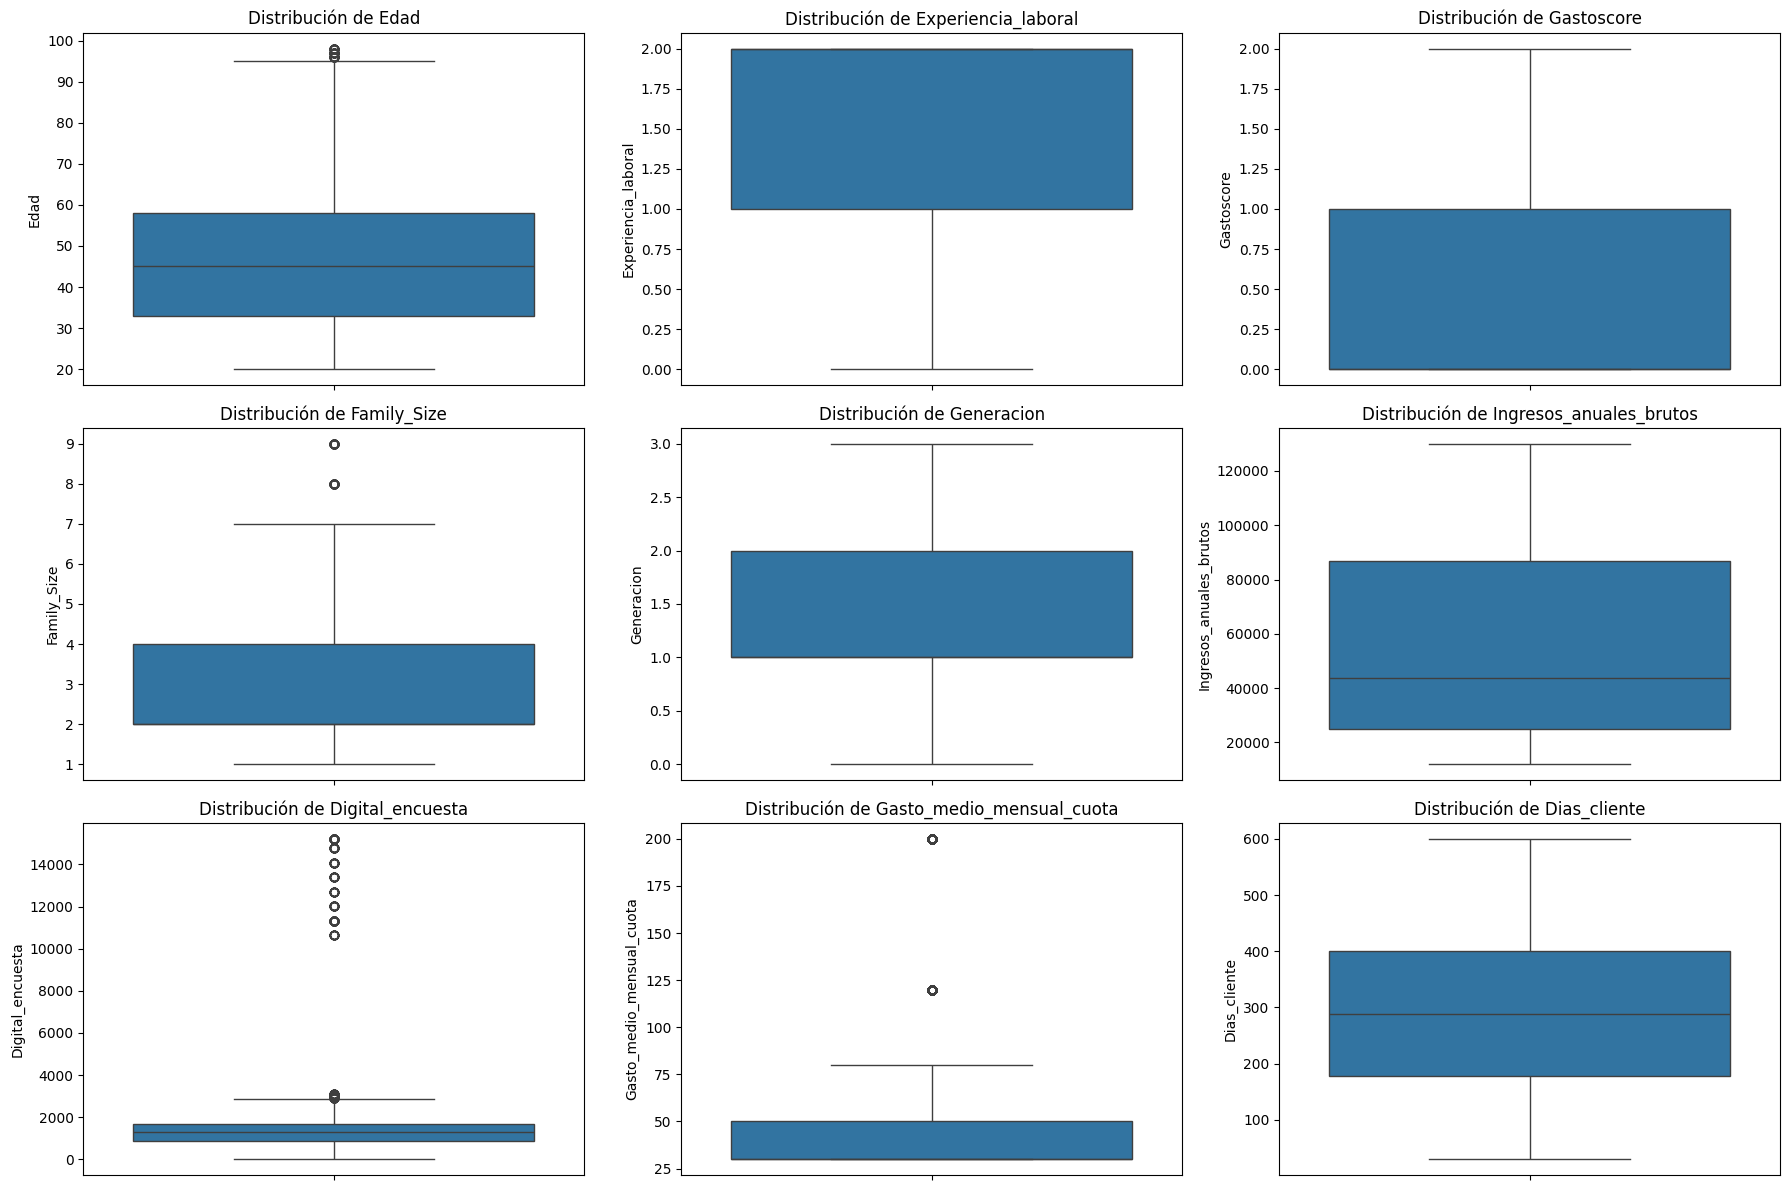

In [42]:
# Asegurarse de que todas las columnas sean numéricas
for col in continuous_cols:
    df_pca[col] = pd.to_numeric(df_pca[col], errors='coerce')

# Crear boxplots nuevamente
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = axs.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(y=df_pca[col], ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Lista de variables continuas
continuous_cols = [
    'Edad', 'Experiencia_laboral', 'Gastoscore', 'Family_Size', 'Generacion',
    'Ingresos_anuales_brutos', 'Digital_encuesta',
    'Gasto_medio_mensual_cuota', 'Dias_cliente'
]

# Asegúrate de que estas columnas estén en tipo numérico
for col in continuous_cols:
    df_pca[col] = pd.to_numeric(df_pca[col], errors='coerce')

# Función para eliminar outliers por IQR
def eliminar_outliers_iqr(df, columnas):
    df_filtrado = df.copy()
    for col in columnas:
        Q1 = df_filtrado[col].quantile(0.1)
        Q3 = df_filtrado[col].quantile(0.9)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[
            (df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)
        ]
    return df_filtrado

# Aplicar la función
df_sin_outliers = eliminar_outliers_iqr(df_pca, continuous_cols)

# Resultado: comparación de dimensiones
print(f"Antes: {df_pca.shape}")
print(f"Después de eliminar outliers: {df_sin_outliers.shape}")

Antes: (10518, 29)
Después de eliminar outliers: (10065, 29)


Varianza explicada por PC1: 43.36%
Varianza explicada por PC2: 12.77%
Varianza total acumulada: 56.13%


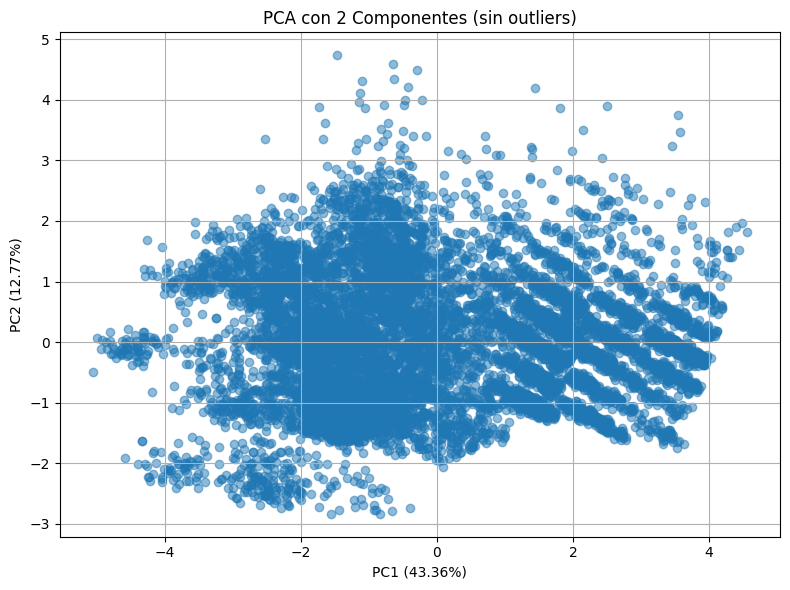

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Aseguramos que las columnas sean numéricas
for col in continuous_cols:
    df_sin_outliers[col] = pd.to_numeric(df_sin_outliers[col], errors='coerce')

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sin_outliers[continuous_cols])

# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los resultados del PCA
df_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_sin_outliers.index)

# Variancia explicada
explained_var = pca.explained_variance_ratio_ * 100
print(f"Varianza explicada por PC1: {explained_var[0]:.2f}%")
print(f"Varianza explicada por PC2: {explained_var[1]:.2f}%")
print(f"Varianza total acumulada: {explained_var.sum():.2f}%")

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], alpha=0.5)
plt.xlabel(f'PC1 ({explained_var[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_var[1]:.2f}%)')
plt.title('PCA con 2 Componentes (sin outliers)')
plt.grid(True)
plt.tight_layout()
plt.show()